In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from sklearn.linear_model import LinearRegression as LR

In [2]:
# Read from opt.dat
fname = 'opt.dat'
numdata = np.loadtxt(fname, usecols=(0, 1, 2))
filterdata = np.loadtxt(fname, usecols=(3), dtype='str')

In [3]:
# Obtain I-band magnitude and errors alone, by masking for it. Also get time support
mask = filterdata == 'I'
ibandmag = numdata[mask][:,1]
ibandmagerror = numdata[mask][:,2]
time = numdata[mask][:,0]

In [4]:
# Convert from magnitude to flux. Also do error propagation
ibandflux = np.power(10, -0.4 * ibandmag - 19.44) 
ibandfluxerror = np.power(10, -0.4 * ibandmag - 19.44) * np.log(10) * (-0.4) * np.std(ibandmag)

### Error Propagation 
Suppose $x = f(u,v)$ and that u, v are uncorrelated with errors $\sigma_{u,v}$ respectively. Then, the error in :
1. $x = au \pm bv $ is $\sigma_x^2 = a^2 \sigma_u^2 + b^2 \sigma_v^2$
2. $x = \pm a \dfrac{u}{v} \text{ or } x = \pm a u \cdot v$ is $\left(\dfrac{\sigma_x}{x}\right)^2 = \left(\dfrac{\sigma_u}{u}\right)^2 + \left(\dfrac{\sigma_v}{v}\right)^2$
3. $x = \exp(\pm bu) $ is $\dfrac{\sigma_x}{x} = b \sigma_u$
4. $x = \ln(\pm bu)$ is $\sigma_x = a \dfrac{\sigma_u}{u}$
5. $x = au^{\pm b}$ is $\dfrac{\sigma_x}{x} = b \dfrac{\sigma_u}{u}$

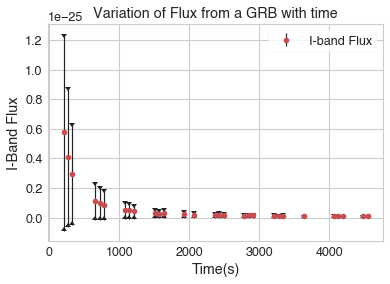

In [6]:
# Plot the I-band flux and errors
plt.errorbar(time, ibandflux, yerr=ibandfluxerror, fmt='ko', mfc='r', mec='k', lolims=True, uplims=True, label='I-band Flux')
plt.xlabel('Time(s)')
plt.ylabel('I-Band Flux')
plt.title('Variation of Flux from a GRB with time')
plt.legend()
#plt.savefig('fluxvtime')

In [7]:
# Define the data to regress
x = np.log(time.reshape(-1,1))
y = np.log(ibandflux)

In [8]:
# Fit a Linear Regression model to the regression data
model = LR().fit(x, y)

In [9]:
# Get fit parameters
rscore = model.score(x, y) # Coefficient of Determination. Higher is better.
slope = model.coef_ # Slope
intercept = model.intercept_ # Intercept

In [44]:
print("The results of linear fitting are - ")
print("\t Coefficient of Determination : %.6f" % (rscore))
print("\t Slope of the line : %.6f" % (slope))
print("\t Intercept of the line : %.6f" % (intercept))

The results of linear fitting are - 
	 Coefficient of Determination : 0.992131
	 Slope of the line : -1.371264
	 Intercept of the line : -50.886725
